In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import utils

In [3]:
# using linspace(start, stop, num) to generate the values in X equally distributed between 0 and 20
# num is 50 (default)
X = np.linspace(0, 20)
y = -2*X + 1 

In [4]:
def stochastic_GD(x,y,alpha):
    #1. Initialize parameters (theta_0 & theta_1) with zero.
    theta_0 = 0
    theta_1 = 0
    
    thetas_0 = []
    thetas_1 = []
    js = []
    x, y = utils.shuffle(x, y)
    #7. Repeat from 2 to 6 until converge to the minimum or achieve maximum iterations.
    for i in range(1000):
        for f in range(len(x)):
            #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x
            hx = theta_0 + (theta_1 * x[f])

            #3. Calculate Cost function 𝑱(theta_0,theta_1 )
            j = (np.sum(hx - y[f])**2)/2

            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            js.append(j)

            #4. Calculate the gradient
            g_theta_0 = hx - y[f]
            g_theta_1 = (hx-y[f]) * x[f]

            #5. Update the parameters (simultaneously)
            theta_0 = theta_0 - (alpha * g_theta_0)
            theta_1 = theta_1 - (alpha * g_theta_1)
        #print(abs(js[(i-1)*f] - js[i*f]) )
        #7. Stop condition
        if i>1 and abs(js[(i-1)*f] - js[i*f]) < 0.02:
            break;

    return i, f, thetas_0, thetas_1, js

In [5]:
i, f, thetas_0, thetas_1, js = stochastic_GD(X,y,0.001)

In [6]:
print(f'''the function has been iterating {i} times\nand the min cost is {js[-1]}''')

the function has been iterating 2 times
and the min cost is 0.003981445314429838


In [7]:
yhat = thetas_0[-1] + thetas_1[-1] * X

Text(0.5, 1.0, 'best peridected fitting line for 2 iterations')

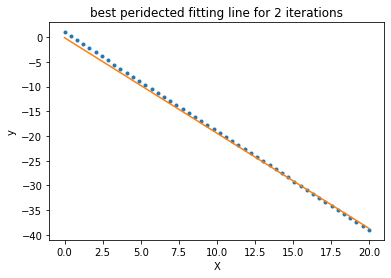

In [8]:
plt.plot(X,y,'.',linestyle='none')
#plt.scatter(X,y)
plt.plot(X, yhat)
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"best peridected fitting line for {i} iterations")

Text(0.5, 1.0, 'Cost function')

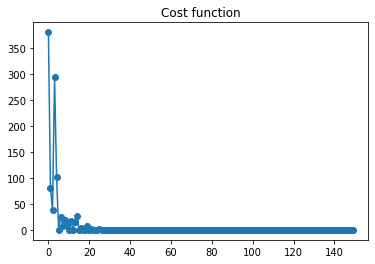

In [9]:
plt.plot(np.arange(len(js)),js,'-o')
plt.title("Cost function")

Text(0.5, 1.0, 'Cost function')

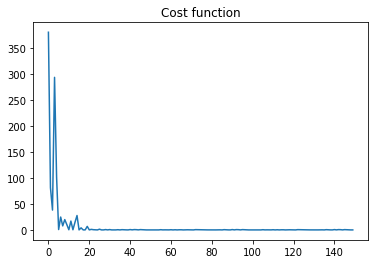

In [10]:
# with alpha = 0.0001 and threshold = 0.001
plt.plot(js)
plt.title("Cost function")

Text(0.5, 1.0, 'theta 0 vs cost function')

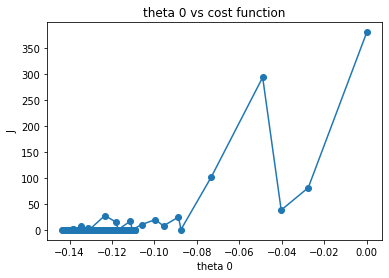

In [11]:
# theta 0
plt.plot(thetas_0,js, '-o')
plt.xlabel("theta 0")
plt.ylabel("J")
plt.title("theta 0 vs cost function")

Text(0.5, 1.0, 'theta 1 vs cost function')

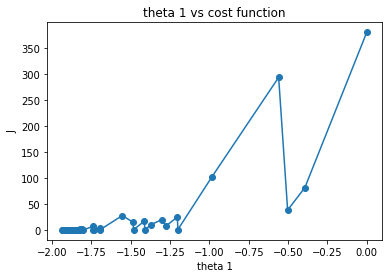

In [12]:
# theta 1
plt.plot(thetas_1,js, '-o')
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

In [13]:
from sklearn.metrics import r2_score
print(f"The accuracy is {int(r2_score(y, yhat)*100)}%")


The accuracy is 99%
